In [92]:
import pydicom
from pydicom.data import get_testdata_files
import cv2
import os
from matplotlib import pyplot as plt

In [103]:
CT_IMAGE_DIR = './DICOM/'
CT_IMAGE_NAME = '1-080'
CT_IMAGE_EXTEINSION  = '.dcm'
CT_IMAGE = CT_IMAGE_DIR + CT_IMAGE_NAME + CT_IMAGE_EXTEINSION

CT_IMAGE

'./DICOM/1-080.dcm'

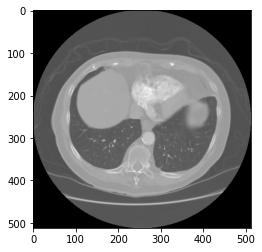

In [104]:
a = pydicom.read_file(CT_IMAGE).pixel_array

plt.imshow(a, cmap = "gray")

In [79]:
dcm_files = os.listdir(path=pixel_array_IMAGE_DIR)

dcm_files

['1-013.dcm',
 '1-007.dcm',
 '1-006.dcm',
 '1-012.dcm',
 '1-038.dcm',
 '1-004.dcm',
 '1-010.dcm',
 '1-011.dcm',
 '1-005.dcm',
 '1-039.dcm',
 '1-001.dcm',
 '1-015.dcm',
 '1-029.dcm',
 '1-028.dcm',
 '1-014.dcm',
 '1-016.dcm',
 '1-002.dcm',
 '1-003.dcm',
 '1-017.dcm',
 '1-058.dcm',
 '1-070.dcm',
 '1-064.dcm',
 '1-104.dcm',
 '1-110.dcm',
 '1-111.dcm',
 '1-105.dcm',
 '1-065.dcm',
 '1-071.dcm',
 '1-059.dcm',
 '1-067.dcm',
 '1-073.dcm',
 '1-098.dcm',
 '1-113.dcm',
 '1-107.dcm',
 '1-106.dcm',
 '1-112.dcm',
 '1-099.dcm',
 '1-072.dcm',
 '1-066.dcm',
 '1-062.dcm',
 '1-076.dcm',
 '1-089.dcm',
 '1-116.dcm',
 '1-102.dcm',
 '1-103.dcm',
 '1-117.dcm',
 '1-088.dcm',
 '1-077.dcm',
 '1-063.dcm',
 '1-075.dcm',
 '1-061.dcm',
 '1-049.dcm',
 '1-101.dcm',
 '1-115.dcm',
 '1-129.dcm',
 '1-128.dcm',
 '1-114.dcm',
 '1-100.dcm',
 '1-048.dcm',
 '1-060.dcm',
 '1-074.dcm',
 '1-079.dcm',
 '1-051.dcm',
 '1-045.dcm',
 '1-092.dcm',
 '1-086.dcm',
 '1-119.dcm',
 '1-125.dcm',
 '1-131.dcm',
 '1-130.dcm',
 '1-124.dcm',
 '069.

In [78]:
ds = pydicom.read_file(CT_IMAGE)

ds

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.262721256650280657946440242654
(0008, 0020) Study Date                          DA: '20000101'
(0008, 0021) Series Date                         DA: '20000101'
(0008, 0022) Acquisition Date                    DA: '20000101'
(0008, 0023) Content Date                        DA: '20000101'
(0008, 0024) Overlay Date                        DA: '20000101'
(0008, 0025) Curve Date                          DA: '20000101'
(0008, 002a) Acquisition DateTime                DT: '20000101'
(0008, 0030) Study Time                          TM: ''
(0008, 0032) Acquisition Time                    TM: ''
(0008, 0033) Content Time                        TM: ''
(0008, 0050) Accession Number               

In [72]:
wc  = ds.WindowCenter # ウィンドウセンター値を代入
ww  = ds.WindowWidth # ウィンドウ幅を代入
img = ds.pixel_array # 画素値を代入

In [73]:
max = wc + ww/2                     
min = wc - ww/2      
print("wc=",wc,"ww=",ww,"→ max=",max," min=",min)  

wc= -600 ww= 1600 → max= 200.0  min= -1400.0


In [74]:
#ウインドニング処理
img = 255*(img - min)/(max - min) # 最大と最小画素値を0から255に変換        
img[img > 255] = 255 # 255より大きい画素値は255に変換
img[img < 0] = 0 # JPEG画像として保存
cv2.imwrite(CT_IMAGE_NAME + '.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 100])

True

In [82]:
def readDicom2jpeg(dcmfnm): # DICOM画像を読込，ウィンドニングしてJPEGに保存
    ds  = pydicom.read_file('./DICOM/' + dcmfnm) # DICOM画像を読み込む
    wc  = ds.WindowCenter # ウィンドウセンター値を代入
    ww  = ds.WindowWidth #  ウィンドウ幅を代入       
    img = ds.pixel_array # 画素値を代入        
        
    # 表示画素値の最大と最小を計算する
    max = wc + ww/2                     
    min = wc - ww/2      
    print("wc=",wc,"ww=",ww,"→ max=",max," min=",min)  
   
    # ウインドニング処理
    img = 255*(img - min)/(max - min) # 最大と最小画素値を0から255に変換        
    img[img > 255] = 255 # 255より大きい画素値は255に変換
    img[img < 0] = 0 # JPEG画像として保存
    cv2.imwrite(f'./JPEG/{str(dcmfrm).rstrip(".dcm")}.jpg', img, [cv2.IMWRITE_JPEG_QUALITY, 100])

In [83]:
for dcmfrm in dcm_files:
    readDicom2jpeg(dcmfrm)

wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 ww= 1600 → max= 200.0  min= -1400.0
wc= -600 w

InvalidDicomError: File is missing DICOM File Meta Information header or the 'DICM' prefix is missing from the header. Use force=True to force reading.